In [1]:
pip install -q transformers datasets scikit-learn nltk wordcloud matplotlib seaborn


In [20]:
# For working with data tables (DataFrames)
import pandas as pd
import numpy as np

# For cleaning our text data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For building and evaluating machine learning model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# For creating nice plots
import matplotlib.pyplot as plt
import seaborn as sns

# A little setup for  text processing tools
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download("vader_lexicon")
from nltk.sentiment import SentimentIntensityAnalyzer

# Set a nice style for plots
sns.set_style('whitegrid')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Dataset

In [4]:
#Load the dataset
file_path = "/content/drive/MyDrive/real_world_worry_waves_dataset.csv"
df = pd.read_csv(file_path)


# Basic inspection
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSample rows:")
display(df.head(3))

Shape of dataset: (1152, 189)

Columns:
 ['id', 'prolific_id', 'worry_wave1', 'chosen_emotion_wave1', 'anger_wave1', 'disgust_wave1', 'fear_wave1', 'anxiety_wave1', 'sadness_wave1', 'happiness_wave1', 'relaxation_wave1', 'desire_wave1', 'text_long_wave1', 'text_short_wave1', 'self_rating_general_wave1', 'self_rating_short_wave1', 'self_rating_long_wave1', 'twitter_general_often_wave1', 'twitter_tweet_often_wave1', 'twitter_participate_often_wave1', 'eng_native_wave1', 'ntok_long_wave1', 'nchar_long_wave1', 'ntok_short_wave1', 'nchar_short_wave1', 'cld_lang_long_wave1', 'cld_lang_short_wave1', 'n_punct_wave1', 'prop_punct_wave1', 'started_datetime_wave1', 'completed_date_time_wave1', 'time_taken_wave1', 'age_wave1', 'country of birth_wave1', 'current country of residence_wave1', 'employment status_wave1', 'first language_wave1', 'nationality_wave1', 'sex_wave1', 'student status_wave1', 'worry_wave2', 'chosen_emotion_wave2', 'anger_wave2', 'disgust_wave2', 'fear_wave2', 'anxiety_wave2', 

,id,prolific_id,worry_wave1,chosen_emotion_wave1,anger_wave1,disgust_wave1,fear_wave1,anxiety_wave1,sadness_wave1,happiness_wave1,...,ccaq_physical_lovedones_delta,ccaq_mental_lovedones_delta,ccaq_safety_lovedones_delta,ccaq_losingjob_delta,ccaq_financial_delta,ccaq_gettingbasics_delta,ccaq_socialunrest_delta,ccaq_separatedfamily_delta,ccaq_domviolence_delta,name_cluster_ccaq_delta
0,1,REMOVED,6,Anxiety,2,2,5,5,5,4,...,2,0,-1,0,0,0,2,-1,0,overworrier
1,2,REMOVED,6,Relaxation,1,1,1,2,2,5,...,4,3,4,1,3,3,3,3,3,realisticworrier
2,3,REMOVED,3,Relaxation,2,1,2,2,4,6,...,5,4,5,1,0,1,1,1,0,realisticworrier


### Data Preprocessing

#### Select Key Columns

In [5]:
# Relevant columns

selected_cols = ['worry_wave1', 'chosen_emotion_wave1', 'anger_wave1', 'disgust_wave1', 'fear_wave1', 'anxiety_wave1',
                 'sadness_wave1', 'happiness_wave1', 'relaxation_wave1', 'desire_wave1', 'text_long_wave1',
                 'twitter_general_often_wave1', 'employment status_wave1', 'sex_wave1', 'student status_wave1', 'worry_wave2',
                 'chosen_emotion_wave2', 'anger_wave2', 'disgust_wave2', 'fear_wave2', 'anxiety_wave2', 'sadness_wave2', 'happiness_wave2',
                 'relaxation_wave2', 'desire_wave2', 'text_long_wave2', 'self_rating_long_wave2', 'twitter_general_often_wave2', 'age_wave2',
                 'employment status_wave2', 'sex_wave2', 'student status_wave2', 'worry_wave3', 'chosen_emotion_wave3', 'anger_wave3', 'disgust_wave3',
                 'fear_wave3', 'anxiety_wave3', 'sadness_wave3', 'happiness_wave3', 'relaxation_wave3', 'desire_wave3', 'text_long_wave3',
                 'age_wave3', 'employment status_wave3', 'sex_wave3', 'student status_wave3','life_event_descr_wave3', 'life_event_descr_2_wave3','life_event_descr','life_event_descr_2', 'name_cluster_ccaq_delta',
]

df = df[selected_cols]
print("New shape:", df.shape)
df.head()

New shape: (1152, 52)


,worry_wave1,chosen_emotion_wave1,anger_wave1,disgust_wave1,fear_wave1,anxiety_wave1,sadness_wave1,happiness_wave1,relaxation_wave1,desire_wave1,...,text_long_wave3,age_wave3,employment status_wave3,sex_wave3,student status_wave3,life_event_descr_wave3,life_event_descr_2_wave3,life_event_descr,life_event_descr_2,name_cluster_ccaq_delta
0,6,Anxiety,2,2,5,5,5,4,4,4,...,"I am just getting over Covid, so in a way I fe...",59.0,"Not in paid work (e.g. homemaker', 'retired or...",Female,DATA EXPIRED,Catching Covid! It is both a negative and posi...,NaN,NaN,NaN,overworrier
1,6,Relaxation,1,1,1,2,2,5,6,4,...,I'm very relaxed about the current Corona situ...,63.0,DATA EXPIRED,Male,DATA EXPIRED,NaN,NaN,NaN,NaN,realisticworrier
2,3,Relaxation,2,1,2,2,4,6,8,7,...,I feel angry that precautions have been comple...,49.0,Full-Time,Male,No,NaN,NaN,NaN,NaN,realisticworrier
3,5,Anxiety,2,2,2,4,2,3,3,1,...,I'm happy that all the restrictions are lifted...,39.0,Full-Time,Male,DATA EXPIRED,NaN,NaN,NaN,NaN,realisticworrier
4,5,Relaxation,3,1,4,2,3,7,7,2,...,Annoyed that there are still lots of cases and...,51.0,DATA EXPIRED,Female,No,NaN,NaN,NaN,NaN,overworrier


In [6]:
df_copy = df.copy()
df_copy.head()

,worry_wave1,chosen_emotion_wave1,anger_wave1,disgust_wave1,fear_wave1,anxiety_wave1,sadness_wave1,happiness_wave1,relaxation_wave1,desire_wave1,...,text_long_wave3,age_wave3,employment status_wave3,sex_wave3,student status_wave3,life_event_descr_wave3,life_event_descr_2_wave3,life_event_descr,life_event_descr_2,name_cluster_ccaq_delta
0,6,Anxiety,2,2,5,5,5,4,4,4,...,"I am just getting over Covid, so in a way I fe...",59.0,"Not in paid work (e.g. homemaker', 'retired or...",Female,DATA EXPIRED,Catching Covid! It is both a negative and posi...,NaN,NaN,NaN,overworrier
1,6,Relaxation,1,1,1,2,2,5,6,4,...,I'm very relaxed about the current Corona situ...,63.0,DATA EXPIRED,Male,DATA EXPIRED,NaN,NaN,NaN,NaN,realisticworrier
2,3,Relaxation,2,1,2,2,4,6,8,7,...,I feel angry that precautions have been comple...,49.0,Full-Time,Male,No,NaN,NaN,NaN,NaN,realisticworrier
3,5,Anxiety,2,2,2,4,2,3,3,1,...,I'm happy that all the restrictions are lifted...,39.0,Full-Time,Male,DATA EXPIRED,NaN,NaN,NaN,NaN,realisticworrier
4,5,Relaxation,3,1,4,2,3,7,7,2,...,Annoyed that there are still lots of cases and...,51.0,DATA EXPIRED,Female,No,NaN,NaN,NaN,NaN,overworrier


#### Check for empty rows in target column

In [7]:
missing_labels = df_copy['name_cluster_ccaq_delta'].isnull().sum()
print(f'Number of rows with missing target label: {missing_labels}')

Number of rows with missing target label: 0


In [8]:
df_copy['name_cluster_ccaq_delta'].value_counts()

,count
name_cluster_ccaq_delta,
overworrier,670
realisticworrier,482


Distribution of Worrier Types:
name_cluster_ccaq_delta
overworrier         670
realisticworrier    482
Name: count, dtype: int64


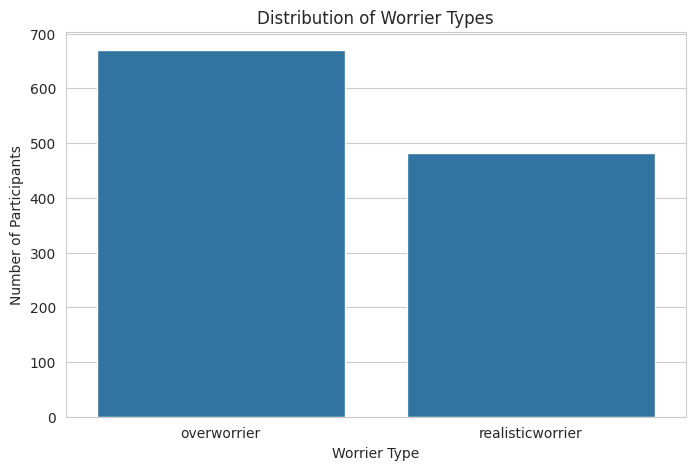

In [9]:
# Count the number of participants in each category
print("Distribution of Worrier Types:")
print(df_copy['name_cluster_ccaq_delta'].value_counts())

# visualise this distribution with a bar chart
plt.figure(figsize=(8, 5))
sns.countplot(x='name_cluster_ccaq_delta', data=df_copy)
plt.title('Distribution of Worrier Types')
plt.ylabel('Number of Participants')
plt.xlabel('Worrier Type')
plt.show()

#### Group all text columns

In [10]:
# identify the text columns again from the selected DataFrame
text_cols = [
    'text_long_wave1',
    'text_long_wave2',
    'text_long_wave3',
    'life_event_descr_wave3',
    'life_event_descr_2_wave3',
    'life_event_descr',
    'life_event_descr_2'
]

# Some text fields might be empty (which pandas reads as 'NaN').
# fill these with an empty string so we can join them without errors.
df_copy[text_cols] = df_copy[text_cols].fillna('')

# join the text from all these columns into a single new column.
# The ' '.join() part puts a space between the text from each column.
df_copy['full_text'] = df_copy[text_cols].apply(lambda row: ' '.join(row), axis=1)

# Let's look at an example from the first participant to see the new column
print(" Example of combined 'full_text' for the first participant ")
print(df_copy['full_text'].iloc[0])

 Example of combined 'full_text' for the first participant 
I am more worried about getting access to my normal healthcare at  the moment, than being concerned about Corona. My usual treatments have been halted, so my health will deteriorate even if I don't catch the virus!
I am struggling to get routine prescriptions and medical appointments, which is making me feel powerless and anxious.
I am also feeling very sad, as I can not see my children and grandchildren and can not celebrate birthdays and anniversaries with them.
I have been advised to stay inside my house for twelve weeks. The thought of this is making me unhappy, as all that I want to do is to go outside for a walk, but that is not possible right now. I am hopeful that the vaccine will help to bring back normality, but I am also worried that sending children back to school next week will start another wave of the virus, as numbers of infected people are still quite high.
I hope that I can see my family again soon. It has be

####

In [11]:
# List of the core emotion types
emotion_types = [
    'worry', 'anger', 'disgust', 'fear', 'anxiety',
    'sadness', 'happiness', 'relaxation', 'desire'
]

# Loop through each emotion type
for emotion in emotion_types:
    # Find the 3 columns related to this emotion (e.g., 'anger_wave1', 'anger_wave2', 'anger_wave3')
    emotion_wave_cols = [f'{emotion}_wave1', f'{emotion}_wave2', f'{emotion}_wave3']

    # Calculate the average across the 3 waves and create a new column
    df_copy[f'avg_{emotion}'] = df_copy[emotion_wave_cols].mean(axis=1)

# new average columns
df_copy[['avg_worry', 'avg_anger', 'avg_anxiety', 'avg_happiness']].head()

,avg_worry,avg_anger,avg_anxiety,avg_happiness
0,5.333333,2.333333,4.333333,3.666667
1,4.333333,1.000000,2.000000,5.666667
2,4.000000,3.333333,3.000000,5.333333
3,3.666667,2.333333,2.000000,2.000000
4,4.000000,2.333333,1.666667,7.000000


In [12]:
df_copy = df_copy.drop(columns = ['text_long_wave1','text_long_wave2','text_long_wave3','life_event_descr_wave3','life_event_descr_2_wave3','life_event_descr','life_event_descr_2', 'worry_wave1', 'chosen_emotion_wave1', 'anger_wave1', 'disgust_wave1', 'fear_wave1', 'anxiety_wave1',
                 'sadness_wave1', 'happiness_wave1', 'relaxation_wave1', 'desire_wave1','worry_wave2',
                 'anger_wave2', 'disgust_wave2', 'fear_wave2', 'anxiety_wave2', 'sadness_wave2', 'happiness_wave2',
                 'relaxation_wave2', 'desire_wave2', 'worry_wave3', 'anger_wave3', 'disgust_wave3',
                 'fear_wave3', 'anxiety_wave3', 'sadness_wave3', 'happiness_wave3', 'relaxation_wave3', 'desire_wave3'])
print("New shape:", df_copy.shape)
df_copy.head()

New shape: (1152, 27)


,twitter_general_often_wave1,employment status_wave1,sex_wave1,student status_wave1,chosen_emotion_wave2,self_rating_long_wave2,twitter_general_often_wave2,age_wave2,employment status_wave2,sex_wave2,...,full_text,avg_worry,avg_anger,avg_disgust,avg_fear,avg_anxiety,avg_sadness,avg_happiness,avg_relaxation,avg_desire
0,9,"Not in paid work (e.g. homemaker', 'retired or...",Female,No,Anxiety,8,9,58.0,"Not in paid work (e.g. homemaker', 'retired or...",Female,...,I am more worried about getting access to my n...,5.333333,2.333333,2.333333,4.333333,4.333333,4.666667,3.666667,5.666667,3.666667
1,6,Full-Time,Male,No,Relaxation,6,3,62.0,Full-Time,Male,...,I am a little concerned that so many people ar...,4.333333,1.000000,1.000000,1.000000,2.000000,2.000000,5.666667,6.333333,4.333333
2,9,Full-Time,Male,No,Relaxation,8,9,48.0,Full-Time,Male,...,I feel relaxed. I'm aware of the risks and I'm...,4.000000,3.333333,2.666667,2.666667,3.000000,4.666667,5.333333,6.333333,4.666667
3,3,Full-Time,Male,No,Sadness,8,9,38.0,Full-Time,Male,...,"I feel a little stressed by it all, I would li...",3.666667,2.333333,2.333333,1.333333,2.000000,2.333333,2.000000,2.000000,1.000000
4,3,Part-Time,Female,No,Relaxation,8,2,50.0,Part-Time,Female,...,I am fed up about not being able to go out whe...,4.000000,2.333333,1.666667,2.666667,1.666667,2.666667,7.000000,7.666667,4.000000


In [13]:
print("New shape:", df_copy.shape)
df_copy.head()

New shape: (1152, 27)


,twitter_general_often_wave1,employment status_wave1,sex_wave1,student status_wave1,chosen_emotion_wave2,self_rating_long_wave2,twitter_general_often_wave2,age_wave2,employment status_wave2,sex_wave2,...,full_text,avg_worry,avg_anger,avg_disgust,avg_fear,avg_anxiety,avg_sadness,avg_happiness,avg_relaxation,avg_desire
0,9,"Not in paid work (e.g. homemaker', 'retired or...",Female,No,Anxiety,8,9,58.0,"Not in paid work (e.g. homemaker', 'retired or...",Female,...,I am more worried about getting access to my n...,5.333333,2.333333,2.333333,4.333333,4.333333,4.666667,3.666667,5.666667,3.666667
1,6,Full-Time,Male,No,Relaxation,6,3,62.0,Full-Time,Male,...,I am a little concerned that so many people ar...,4.333333,1.000000,1.000000,1.000000,2.000000,2.000000,5.666667,6.333333,4.333333
2,9,Full-Time,Male,No,Relaxation,8,9,48.0,Full-Time,Male,...,I feel relaxed. I'm aware of the risks and I'm...,4.000000,3.333333,2.666667,2.666667,3.000000,4.666667,5.333333,6.333333,4.666667
3,3,Full-Time,Male,No,Sadness,8,9,38.0,Full-Time,Male,...,"I feel a little stressed by it all, I would li...",3.666667,2.333333,2.333333,1.333333,2.000000,2.333333,2.000000,2.000000,1.000000
4,3,Part-Time,Female,No,Relaxation,8,2,50.0,Part-Time,Female,...,I am fed up about not being able to go out whe...,4.000000,2.333333,1.666667,2.666667,1.666667,2.666667,7.000000,7.666667,4.000000


#### Lemmatisation

In [15]:
# Initialize our lemmatiser (for finding the root form of words)
lemmatizer = WordNetLemmatizer()

# Get the standard list of English stop words
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    A function to clean a string of text.
    - Converts to lowercase
    - Removes punctuation and numbers
    - Tokenises (splits into words)
    - Removes stop words
    - Lemmatises (reduces words to their root form)
    """
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove punctuation and numbers - keep only letters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenise the text (split it into a list of words)
    words = nltk.word_tokenize(text)

    # 4. Remove stop words and lemmatise
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # 5. Join the words back into a single string
    return ' '.join(cleaned_words)

# test the function on a sample sentence
sample_sentence = "I've been feeling incredibly worried and anxious about my future job prospects."
cleaned_sentence = clean_text(sample_sentence)

print(f"Original sentence: '{sample_sentence}'")
print(f"Cleaned sentence:  '{cleaned_sentence}'")

Original sentence: 'I've been feeling incredibly worried and anxious about my future job prospects.'
Cleaned sentence:  'ive feeling incredibly worried anxious future job prospect'


#### Apply lemmatisation function on full text

In [17]:
# Apply the clean_text function to the 'full_text' column.
# The result will be stored in a new 'clean_text' column.
df_copy['final_cleaned_text'] = df_copy['full_text'].apply(clean_text)
df_copy.head()


,twitter_general_often_wave1,employment status_wave1,sex_wave1,student status_wave1,chosen_emotion_wave2,self_rating_long_wave2,twitter_general_often_wave2,age_wave2,employment status_wave2,sex_wave2,...,avg_worry,avg_anger,avg_disgust,avg_fear,avg_anxiety,avg_sadness,avg_happiness,avg_relaxation,avg_desire,final_cleaned_text
0,9,"Not in paid work (e.g. homemaker', 'retired or...",Female,No,Anxiety,8,9,58.0,"Not in paid work (e.g. homemaker', 'retired or...",Female,...,5.333333,2.333333,2.333333,4.333333,4.333333,4.666667,3.666667,5.666667,3.666667,worried getting access normal healthcare momen...
1,6,Full-Time,Male,No,Relaxation,6,3,62.0,Full-Time,Male,...,4.333333,1.000000,1.000000,1.000000,2.000000,2.000000,5.666667,6.333333,4.333333,little concerned many people staying home risk...
2,9,Full-Time,Male,No,Relaxation,8,9,48.0,Full-Time,Male,...,4.000000,3.333333,2.666667,2.666667,3.000000,4.666667,5.333333,6.333333,4.666667,feel relaxed im aware risk im best mitigate im...
3,3,Full-Time,Male,No,Sadness,8,9,38.0,Full-Time,Male,...,3.666667,2.333333,2.333333,1.333333,2.000000,2.333333,2.000000,2.000000,1.000000,feel little stressed would like go outside fre...
4,3,Part-Time,Female,No,Relaxation,8,2,50.0,Part-Time,Female,...,4.000000,2.333333,1.666667,2.666667,1.666667,2.666667,7.000000,7.666667,4.000000,fed able go want miss going shop seeing people...


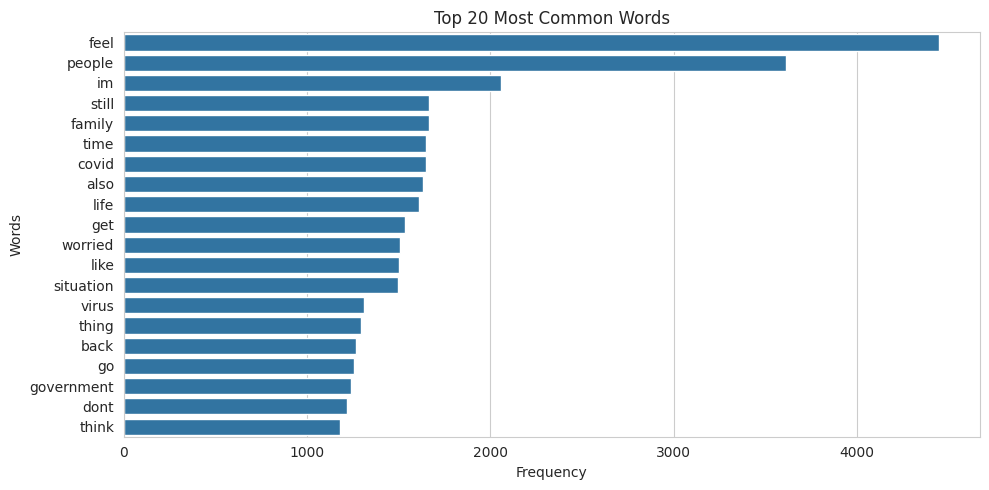

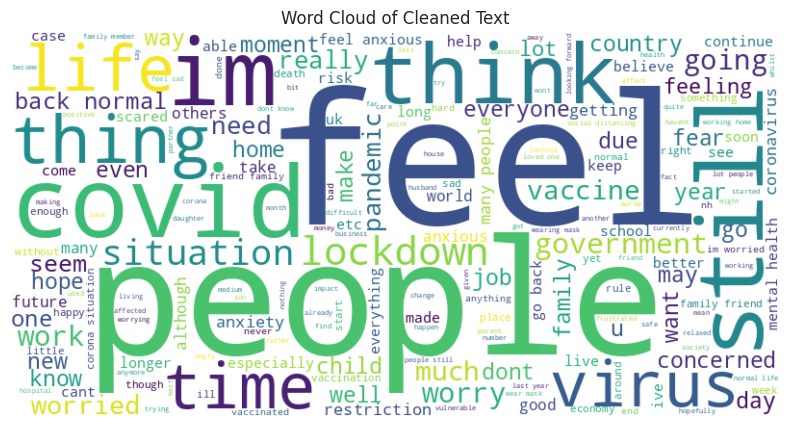

In [22]:
from wordcloud import WordCloud
from collections import Counter


 #Token list for word frequency
all_tokens = ' '.join(df_copy['final_cleaned_text']).split()
top_words = Counter(all_tokens).most_common(20)


words, counts = zip(*top_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.tight_layout()
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Text")
plt.show()


In [18]:
df_copy.columns.to_list()

['twitter_general_often_wave1',
 'employment status_wave1',
 'sex_wave1',
 'student status_wave1',
 'chosen_emotion_wave2',
 'self_rating_long_wave2',
 'twitter_general_often_wave2',
 'age_wave2',
 'employment status_wave2',
 'sex_wave2',
 'student status_wave2',
 'chosen_emotion_wave3',
 'age_wave3',
 'employment status_wave3',
 'sex_wave3',
 'student status_wave3',
 'name_cluster_ccaq_delta',
 'full_text',
 'avg_worry',
 'avg_anger',
 'avg_disgust',
 'avg_fear',
 'avg_anxiety',
 'avg_sadness',
 'avg_happiness',
 'avg_relaxation',
 'avg_desire',
 'final_cleaned_text']

#### VADER Sentiment Analysis




